## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import Imputer,StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline

import pickle
from analytics_tools3 import freq_discrete,plot_event_rate,plot_ks,plot_roc_curve,iv_report
%matplotlib inline 

## Lectura de datos 

In [2]:
df = pd.read_csv('Datos/TSC_churn_telecom.txt')

In [3]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [4]:
df.shape

(2801, 14)

## Clasificación de variables 

In [5]:
var_disc = [v for v in df.columns if v[:2]=='C_']
var_cont = [v for v in df.columns if v[:2]=='V_']
obj = 'TARGET'

## Exploratorio Rápido 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f5a74d350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8f2c0bc610>]], dtype=object)

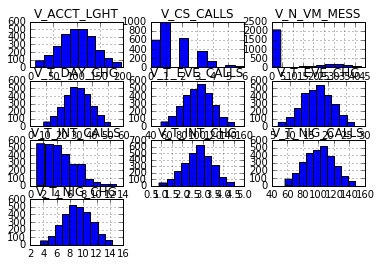

In [6]:
df[var_cont].hist()

In [7]:
df[var_cont].corr()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS
V_ACCT_LGHT,1.000000,0.006403,0.010144,0.038824,-0.001538,0.002904,-0.018335,0.024117,0.018412,-0.012671
V_N_VM_MESS,0.006403,1.000000,-0.000774,-0.010961,0.019215,-0.000553,-0.001205,0.011003,0.005651,-0.009471
V_T_DAY_CHG,0.010144,-0.000774,1.000000,0.010303,0.005383,0.008111,0.002601,0.002464,-0.001028,-0.013518
V_T_EVE_CALLS,0.038824,-0.010961,0.010303,1.000000,-0.007616,0.007311,0.012856,0.000585,-0.018310,-0.015075
V_T_EVE_CHG,-0.001538,0.019215,0.005383,-0.007616,1.000000,-0.012306,-0.014571,0.020250,-0.000887,-0.030214
V_T_NIG_CALLS,0.002904,-0.000553,0.008111,0.007311,-0.012306,1.000000,0.011997,-0.002452,0.002729,-0.015318
V_T_NIG_CHG,-0.018335,-0.001205,0.002601,0.012856,-0.014571,0.011997,1.000000,0.002556,-0.027299,-0.027155
V_T_INT_CALLS,0.024117,0.011003,0.002464,0.000585,0.020250,-0.002452,0.002556,1.000000,-0.008221,-0.003557
V_T_INT_CHG,0.018412,0.005651,-0.001028,-0.018310,-0.000887,0.002729,-0.027299,-0.008221,1.000000,-0.009003
V_CS_CALLS,-0.012671,-0.009471,-0.013518,-0.015075,-0.030214,-0.015318,-0.027155,-0.003557,-0.009003,1.000000


In [8]:
X = df[var_cont].copy()
y = df[obj]

In [9]:
scaler = StandardScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X),columns=var_cont)
pca = PCA()
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p%d'%x for x in range(1,len(var_cont)+1)])

In [ ]:
pca.explained_variance_ratio_.cumsum()

In [ ]:
Xp['target'] = y

sns.lmplot(data=Xp.sample(frac=0.05),x='p1',y='p2',hue='target',fit_reg=False)

In [ ]:
%%time
mds = MDS(n_components=2)
Xm = pd.DataFrame(mds.fit_transform(Xs),columns=['d1','d2'])

In [ ]:
Xm['target'] = y
sns.lmplot(data=Xm.sample(frac=0.05),x='d1',y='d2',hue='target',fit_reg=False)

## Partición de entrenamiento

In [10]:
Xt,Xv,yt,yv =train_test_split(X,y,train_size=0.7)
for d in [Xt,Xv,yt,yv]:
    print d.shape

(1960, 10)
(841, 10)
(1960,)
(841,)


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
def metricas(model,Xt,Xv,yt,yv):
    print roc_auc_score(y_score=model.predict_proba(Xt)[:,1],y_true=yt)
    print roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv)
    print accuracy_score(y_pred=model.predict(Xt),y_true=yt)
    print accuracy_score(y_pred=model.predict(Xv),y_true=yv)
    print confusion_matrix(y_pred=model.predict(Xt),y_true=yt)
    print confusion_matrix(y_pred=model.predict(Xv),y_true=yv)

## Árboles de decisión 

In [42]:
model = DecisionTreeClassifier()
model.fit(Xt,yt)
metricas(model,Xt,Xv,yt,yv)

1.0
0.733391563147
1.0
0.86920332937
[[1686    0]
 [   0  274]]
[[673  63]
 [ 47  58]]


In [43]:
param_grid = dict(criterion=['gini','entropy'],
                 max_depth=range(1,11),
                 min_samples_split = range(100,210,10)
                 )

In [45]:
%%time 
model = DecisionTreeClassifier()
grid = GridSearchCV(cv=10,n_jobs=-1,scoring='roc_auc',
                    estimator=model,
                    param_grid=param_grid)


grid.fit(X,y)

print grid.best_estimator_
print grid.best_params_
print grid.best_score_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=160,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'min_samples_split': 160, 'criterion': 'gini', 'max_depth': 8}
0.840377668479
CPU times: user 5.15 s, sys: 516 ms, total: 5.66 s
Wall time: 15.8 s


In [ ]:
model = grid.best_estimator_
model.fit(Xt,yt)
metricas(model,Xt,Xv,yt,yv)

## Regresión Logística 

In [41]:
model =LogisticRegression()
model.fit(Xt,yt)
metricas(model,Xt,Xv,yt,yv)

0.757312258098
0.740113871636
0.859693877551
0.87514863258
[[1672   14]
 [ 261   13]]
[[733   3]
 [102   3]]


In [ ]:
aux= df[['C_IP',obj,'ID']].copy()
aux = aux.pivot_table(aggfunc='count',columns=obj,fill_value=0,
                      index='C_IP',values='ID')
aux.to_clipboard()

In [ ]:
aux = df[['V_ACCT_LGHT','ID',obj]].copy()

In [ ]:
aux['V_ACCT_LGHT'] = pd.cut(aux.V_ACCT_LGHT,bins=5).astype(str)

In [ ]:
freq_discrete(aux,'V_ACCT_LGHT')

In [ ]:
aux = aux.pivot_table(aggfunc='count',columns=obj,fill_value=0,
                      index='V_ACCT_LGHT',values='ID')
aux.to_clipboard()

## Red neural 

In [ ]:
model  = MLPClassifier()
model.fit(Xt,yt)
metricas(model,Xt,Xv,yt,yv)

In [ ]:
imputer = Imputer(strategy='mean')
scaler = MinMaxScaler()
pca = PCA()
pipe = make_pipeline(imputer,pca,scaler)

In [ ]:
pipe.fit(X)

In [ ]:
Xp=pd.DataFrame(pipe.transform(X),columns=['p%d'%x for x in range(1,len(var_cont)+1)])

In [ ]:
param_grid= dict(hidden_layer_sizes=[(i,) for i in range(5,21)],
activation = ['identity', 'logistic', 'tanh', 'relu'],
solver = ['lbfgs', 'sgd', 'adam'],
learning_rate = ['constant', 'invscaling', 'adaptive'],
max_iter = [10000])

In [ ]:
%%time 
model = MLPClassifier()
grid = GridSearchCV(cv=4,n_jobs=-1,scoring='roc_auc',
                    estimator=model,
                    param_grid=param_grid)

grid.fit(Xp,y)

print grid.best_estimator_
print grid.best_params_
print grid.best_score_

## Máquina Vector Soporte 

In [38]:
param_grid = dict(kernel = ['linear', 'poly', 'rbf', 'sigmoid'],
degree= range(1,6),
decision_function_shape = ('ovo', 'ovr'))

In [39]:
imputer = Imputer(strategy='mean')
scaler = MinMaxScaler()
pca = PCA()
pipe = make_pipeline(imputer,pca,scaler)
pipe.fit(X)
Xp=pd.DataFrame(pipe.transform(X),columns=['p%d'%x for x in range(1,len(var_cont)+1)])

In [40]:
%%time 
model = SVC()
grid = GridSearchCV(cv=4,n_jobs=-1,scoring='roc_auc',
                    estimator=model,
                    param_grid=param_grid)

grid.fit(Xp,y)

print grid.best_estimator_
print grid.best_params_
print grid.best_score_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'kernel': 'rbf', 'decision_function_shape': 'ovo', 'degree': 1}
0.82359253284
CPU times: user 892 ms, sys: 80 ms, total: 972 ms
Wall time: 9.85 s


## K-Vecinos 

In [ ]:
param_grid=dict(algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'],
n_neighbors = range(50,201))

In [ ]:
%%time 
model = KNeighborsClassifier()
grid = GridSearchCV(cv=4,n_jobs=-1,scoring='roc_auc',
                    estimator=model,
                    param_grid=param_grid)

grid.fit(X,y)

print grid.best_estimator_
print grid.best_params_
print grid.best_score_

In [ ]:
model = grid.best_estimator_

In [13]:
#pickle.dump(model,open('pepinillo','wb'))
model = pickle.load(open('pepinillo','rb'))

In [14]:
metricas(model,Xt,Xv,yt,yv)

0.709530396308
0.688366977226
0.860204081633
0.87514863258
[[1686    0]
 [ 274    0]]
[[736   0]
 [105   0]]


## Gradiente Descendiente Estocástico 

In [28]:
param_grid = dict(penalty = ['l2', 'l1','elasticnet'],
alpha = np.arange(0.0001,0.001),
loss = ['log']
#loss = ['hinge', 'log', 'modified_huber','squared_hinge', 
#'perceptron']
                 )

In [32]:
%%time 
model = SGDClassifier()
grid = GridSearchCV(cv=4,n_jobs=-1,scoring='roc_auc',
                    estimator=model,
                    param_grid=param_grid)

grid.fit(X,y)

print grid.best_estimator_
print grid.best_params_
print grid.best_score_

model = grid.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
{'penalty': 'l1', 'alpha': 0.0001, 'loss': 'log'}
0.654739108341
CPU times: user 144 ms, sys: 40 ms, total: 184 ms
Wall time: 328 ms


In [33]:
metricas(model,Xt,Xv,yt,yv)

0.577925985575
0.617248964803
0.340306122449
0.369797859691
[[ 419 1267]
 [  26  248]]
[[212 524]
 [  6  99]]


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


## Bayes Ingenuo 

In [35]:
model = GaussianNB()

In [36]:
model.fit(Xt,yt)

GaussianNB(priors=None)

In [37]:
metricas(model,Xt,Xv,yt,yv)

0.811493969227
0.803454968944
0.867857142857
0.887039239001
[[1646   40]
 [ 219   55]]
[[728   8]
 [ 87  18]]
